## Working in R with Celonis

### Connect to Celonis

In [1]:
from pycelonis import get_celonis

celonis = get_celonis()

2020-02-04 19:35:56 - pycelonis: Login successful! Hello Application Key, this key currently has access to 146 analyses.


### Find the analysis by either searching for the analysis's name or ID

In [2]:
analysis = celonis.analyses.find('3bfc0423-8b69-4601-836f-fa6b9920a765')
analysis

<Analysis, id 3bfc0423-8b69-4601-836f-fa6b9920a765, name Duplicate Checking Res>

### Create demo data

In [ ]:

# create df for plotting example because I don't speak R :)
import pandas as pd
df = pd.DataFrame({
    'cups_of_coffee': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'productivity': [2, 5, 6, 8, 9, 8, 0, 1, 0, -1]
})

### Enable the %%R magic
Not necessary if you've already done this

In [6]:
%load_ext rpy2.ipython


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


###  Run R code in a jupyter notebook
We don't need to take a detour and save as csv, we can directly interface dataframes

/opt/conda/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)
/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Updating HTML index of packages in '.Library'

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Making 'packages.html' ...
  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  done

  warnings.warn(x, RRuntimeWarning)


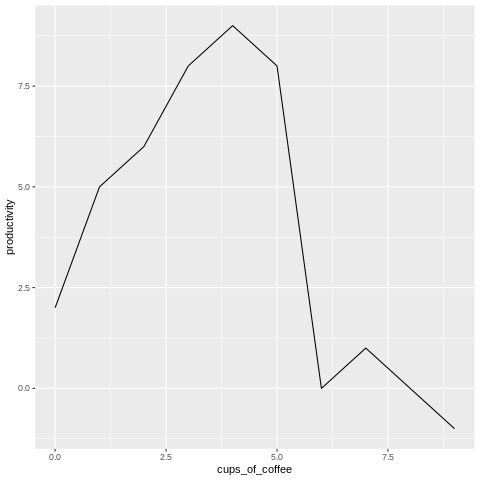

In [7]:
%%R -i df -o df2
# %%R tells jupyter that this cell is actually R code
# -i is used to import df into R environment, -o df2 is used to export df2 into python environment
install.packages("ggplot2", repos='http://cran.us.r-project.org', quiet=TRUE)
library(ggplot2)
library(datasets) #load example datasets so we can test the df export
df2 <- cars
# we can even plot using r libraries
ggplot(df, aes(x=cups_of_coffee, y=productivity)) + geom_line()

### Back to python, we have the df2 available

In [8]:
df2.head()

,speed,dist
0,4.0,2.0
1,4.0,10.0
2,7.0,4.0
3,7.0,22.0
4,8.0,16.0


### Push the table to celonis

In [56]:
data_model = analysis.datamodel
data_model.push_table(df2,"test_DF_R",reload_datamodel=False, if_exists = 'replace')

2020-02-04 19:34:13 - pycelonis: Data push job running, status: {'id': 'd9d68d95-8d16-49cd-9863-8b0db36f2543', 'targetName': 'test_DF_R', 'lastModified': 1580844843813, 'lastPing': None, 'status': 'RUNNING', 'type': 'REPLACE', 'fileType': None, 'targetSchema': 'f177e14e-5768-40f4-b00f-7d27989d1499', 'dataPoolId': 'f177e14e-5768-40f4-b00f-7d27989d1499', 'connectionId': None, 'csvParsingOptions': None, 'logs': ['2020-02-04T19:34:03 - Starting execution, status set to RUNNING'], 'keys': [], 'tableSchema': None, 'optionalTenantId': None}


<DatamodelTable, id aca65784-416c-45fb-a550-5c72a59af06a, name test_DF_R>